In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [3]:
# Loading the dataset
file_path = 'D:/Fuzzy input data.xlsx'
winddata = pd.read_excel(file_path, sheet_name='Sheet1')

In [5]:
# Parameters(Wind Speed, pitch) and target (Power)
X = winddata[['WS', 'pitch']]
y = winddata['Power']

# Split data into training and the last 144 points for forecasting
X_train = X[:-144]
y_train = y[:-144]
X_forecast = X[-144:]
y_forecast_actual = y[-144:]

In [7]:
# Defining the MLPRegressor model
mlp_model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', 
                         max_iter=1000, random_state=42)

# Training the model on the training dataset
mlp_model.fit(X_train, y_train)

# Forecasting the Power for the last 144 data points
y_forecast_pred = mlp_model.predict(X_forecast)

In [8]:
# Calculate metrics
mae = mean_absolute_error(y_forecast_actual, y_forecast_pred)
mse = mean_squared_error(y_forecast_actual, y_forecast_pred)
rmse = np.sqrt(mse)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 2.2301670211924423
Mean Squared Error (MSE): 16.64398941952085
Root Mean Squared Error (RMSE): 4.079704575030017


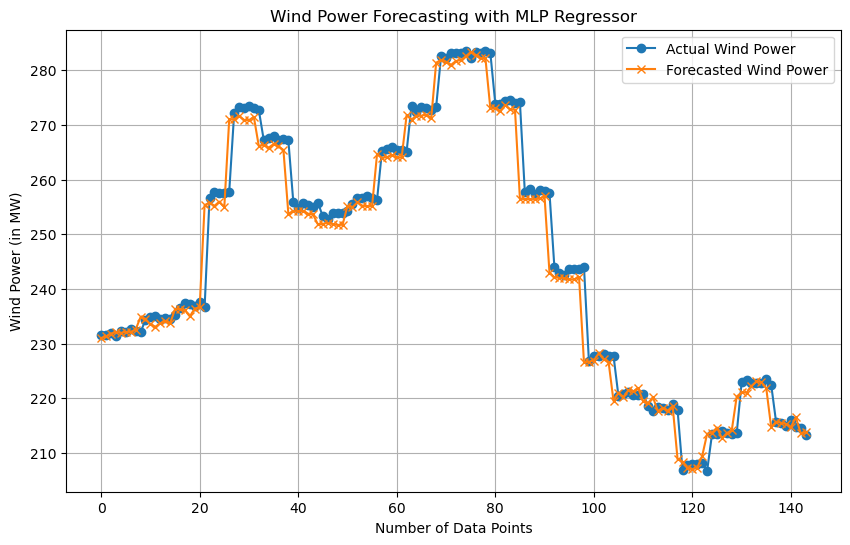

In [11]:
# Plot actual vs forecasted data
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_forecast_actual)), y_forecast_actual, label='Actual Wind Power', marker='o')
plt.plot(range(len(y_forecast_pred)), y_forecast_pred, label='Forecasted Wind Power', marker='x')
plt.xlabel('Number of Data Points')
plt.ylabel('Wind Power (in MW)')
plt.title('Wind Power Forecasting with MLP Regressor')
plt.legend()
plt.grid()
plt.show()
